In [12]:
# Library imports
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.animation import FuncAnimation, PillowWriter
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from labellines import labelLines
import os

import constants as c
from aRead import readAREPO, readSinks, readImage

matplotlib.rcParams['figure.dpi'] = 150

## Whole Cloud Image

In [ ]:
# Load in the image files and snapshots
image1 = readImage("./imageFiles/UV1r2wholeCloud.dat")
image10 = readImage("./imageFiles/UV10r2wholeCloud.dat")
image100 = readImage("./imageFiles/UV100r2wholeCloud.dat")
image1000 = readImage("./imageFiles/UV1000r2wholeCloud.dat")

zoom1 = readImage("./imageFiles/UV1r2zoomCentre.dat")
zoom10 = readImage("./imageFiles/UV10r2zoomCentre.dat")
zoom100 = readImage("./imageFiles/UV100r2zoomCentre.dat")
zoom1000 = readImage("./imageFiles/UV1000r2zoomCentre.dat")

uv1 = readSinks(1, "/UV1r2/sink_snap_019")
uv10 = readSinks(1, "/UV10r2/sink_snap_030")
uv100 = readSinks(1, "/UV100r2/sink_snap_057")
uv1000 = readSinks(1, "/UV1000r2/sink_snap_051")

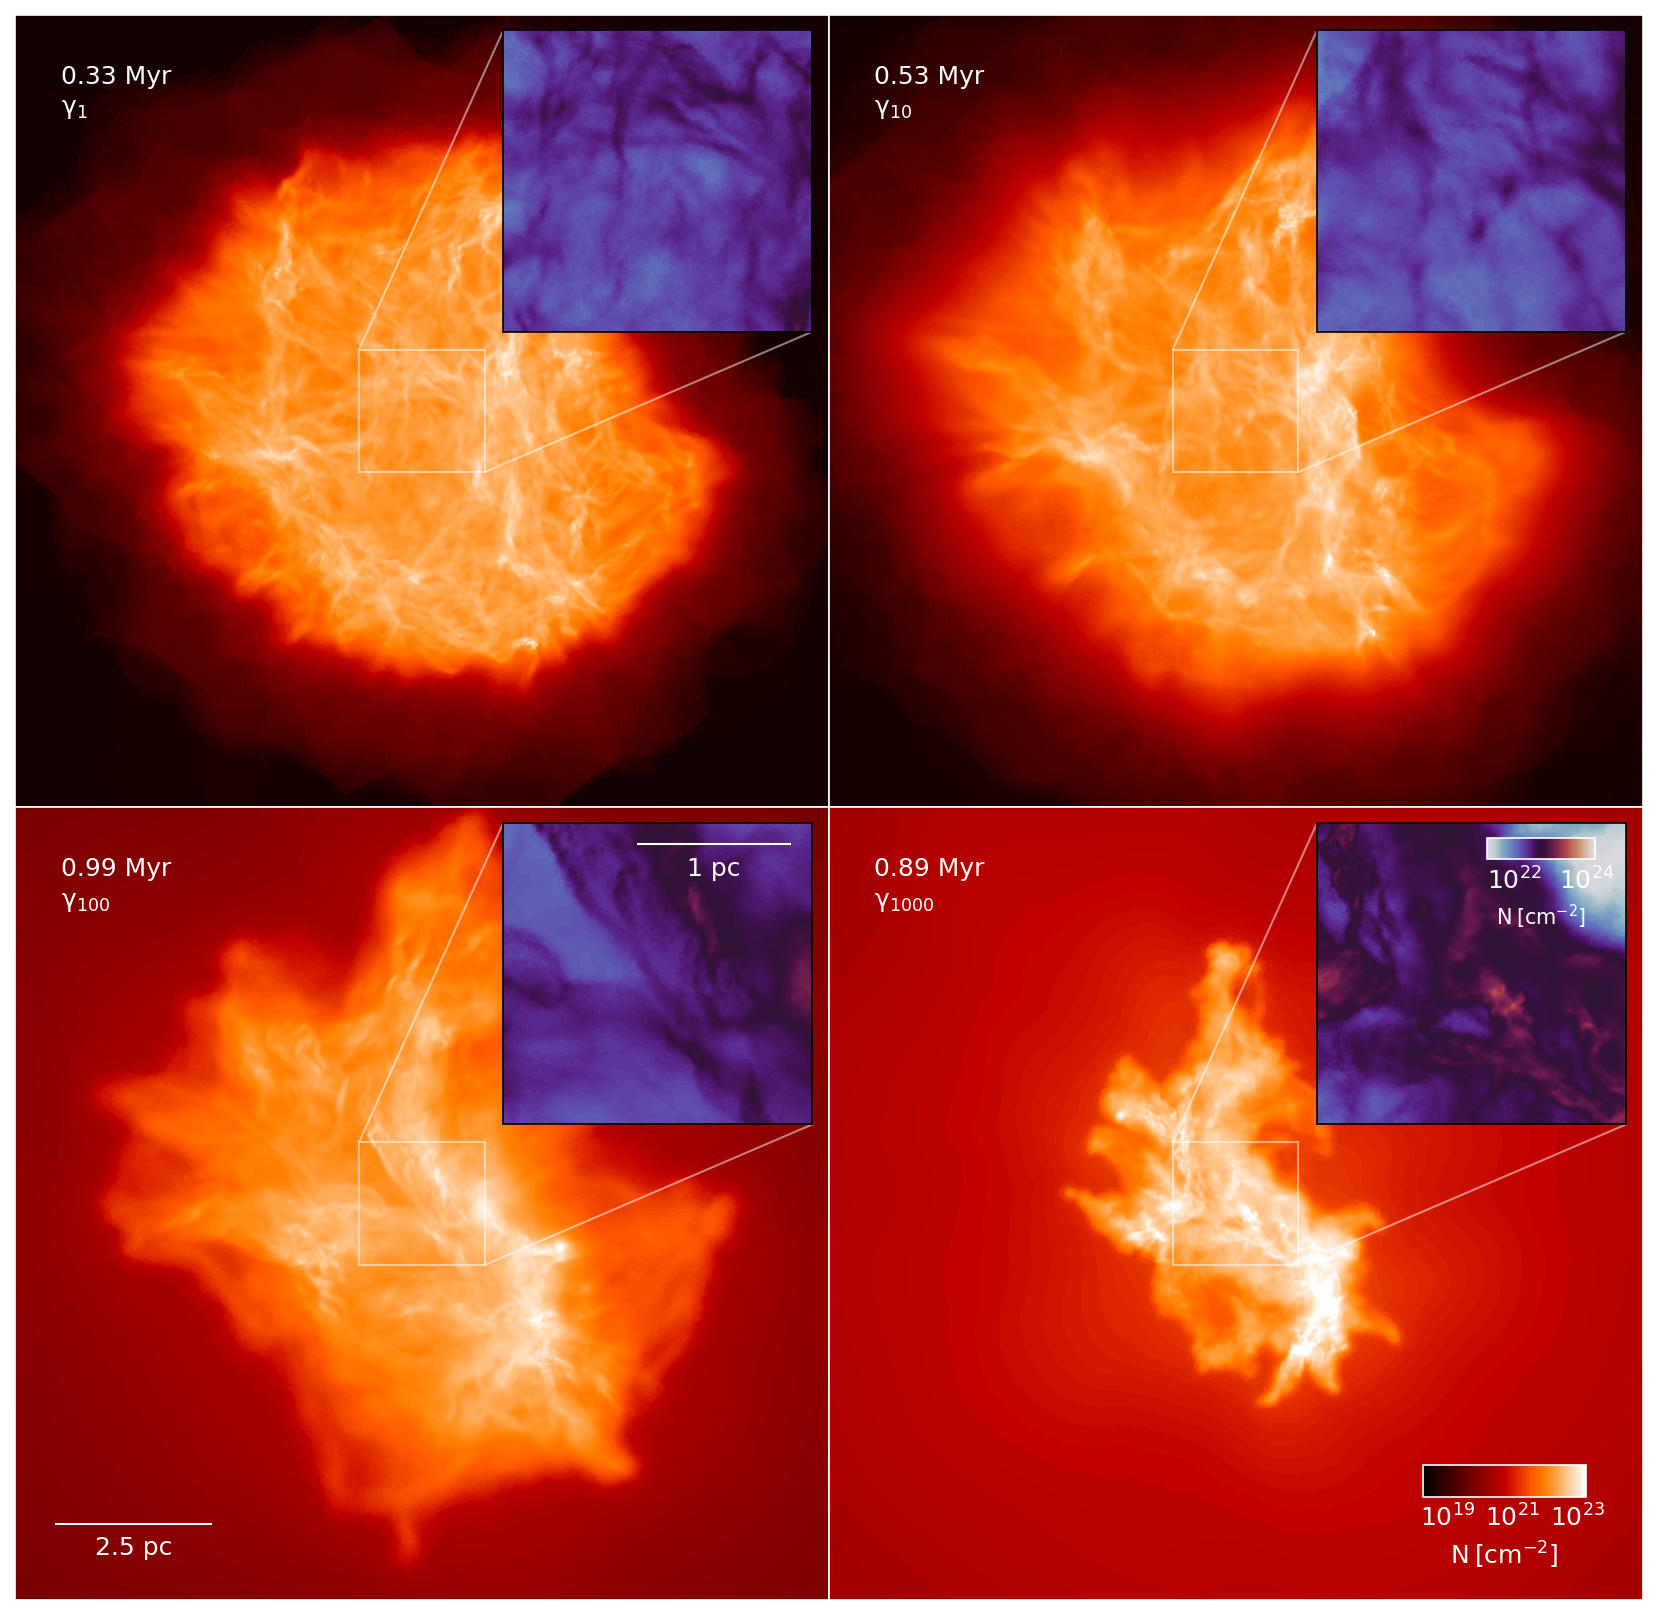

In [4]:
# Setup the figure
fig, axs = plt.subplots(2,2, figsize=(14,14))
fig.subplots_adjust(hspace=0, wspace=0)
matplotlib.rcParams['font.size'] = 12.
matplotlib.rcParams['axes.labelcolor'] = "white"
matplotlib.rcParams['xtick.labelcolor'] = "white"
matplotlib.rcParams['figure.dpi'] = 150

# Loop through each image and plot
ys = [0, 1, 0, 1]
xs = [0, 0, 1, 1]
images = [image1, image10, image100, image1000]
zooms = [zoom1, zoom10, zoom100, zoom1000]
data = [uv1, uv10, uv100, uv1000]
simulation = ["$\\rm \\gamma_1$", "$\\rm \\gamma_{10}$", "$\\rm \\gamma_{100}$", "$\\rm \\gamma_{1000}$"]

for i in range(4):
    image = images[i]
    zoom = zooms[i]
    ax = axs[xs[i], ys[i]]

    # Set scale for the main image
    mincol = 18
    lvls = list(np.linspace(mincol+0.25, mincol+5.25, 100))

    # Get limits and max min values
    limits = [image.y0,image.y1,image.x0,image.x1]
    max_image = np.max(image.image)
    min_image = np.min(image.image)

    # Create plotting grid
    xgrid = np.linspace(image.x0,image.x1,image.nx)*image.ulength_cm/c.pc()
    ygrid = np.linspace(image.y0,image.y1,image.ny)*image.ulength_cm/c.pc()
    colgrid = image.image*image.umass_g/(1.4*c.mProt()*image.ulength_cm**2)

    # Do the plotting
    ax.set_xticks([])
    ax.set_yticks([])
    cs = ax.contourf(xgrid,ygrid,np.log10(colgrid+10**mincol),cmap='gist_heat',levels=lvls)

    # Serup the inset zoom
    x1, x2, y1, y2 = np.median(xgrid) - 1, np.median(xgrid) + 1, np.median(xgrid) - 1, np.median(xgrid) + 1
    axins = ax.inset_axes([0.6, 0.6, 0.38, 0.38], xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[])
    axins.set_xticks([])
    axins.set_yticks([])

    # Create the zoom figure
    limits = [zoom.y0,zoom.y1,zoom.x0, zoom.x1]
    xgrid = np.linspace(zoom.x0,zoom.x1,zoom.nx)*image.ulength_cm/c.pc()
    ygrid = np.linspace(zoom.y0,zoom.y1,zoom.ny)*image.ulength_cm/c.pc()
    colgrid = zoom.image*image.umass_g/(1.4*c.mProt()*image.ulength_cm**2)

    # Set scale for the zoom 
    mincolZoom = 19
    lvlsZoom = list(np.linspace(mincolZoom+2.25, mincolZoom+5.25, 100))

    ac = axins.contourf(xgrid, ygrid, np.log10(colgrid+10**mincolZoom), cmap="twilight", levels=lvlsZoom)
    ax.indicate_inset_zoom(axins, edgecolor="white")

    plt.setp(ax.spines.values(), color="white")

    # Plot the time of the simulation
    time = data[i].time / c.uTime() / (1e6 * c.year())
    ax.text(24.5,35.6,"{:.2f} Myr".format(time), color="white")
    ax.text(24.5,35.1,"%s" % simulation[i], color="white")

    # Add the colourbar for main image
    if i == 3:
        # Colourbar for the big cloud
        cax = ax.inset_axes([0.73, 0.13, 0.2, 0.04])
        cbar = fig.colorbar(cs, cax=cax, orientation="horizontal")
        cbar.set_ticks([19, 21, 23])
        cbar.set_ticklabels(["$10^{19}$", "$10^{21}$", "$10^{23}$"])
        cbar.set_label("$\\rm N \: [cm^{-2}]$")
        cbar.ax.tick_params(size=0)
        cbar.outline.set_edgecolor("white")

        # Colourbar for the zoom in
        cax = axins.inset_axes([0.55, 0.88, 0.35, 0.07])
        cbar = fig.colorbar(ac, cax=cax, orientation="horizontal")
        cbar.set_ticks([22, 24])
        cbar.set_ticklabels(["$10^{22}$", "$10^{24}$"])
        cbar.set_label("$\\rm N \: [cm^{-2}]$", fontsize="small")
        cbar.ax.tick_params(size=0)
        cbar.outline.set_edgecolor("white")

    # Add the scale 
    if i == 2:
        # Scale for the big cloud
        asb = AnchoredSizeBar(ax.transData, 2.5, "2.5 pc", loc="lower left", frameon=False, borderpad=1.5, color="white", sep=6)
        ax.add_artist(asb)

        # Scale for the zoom ins
        asb2 = AnchoredSizeBar(axins.transData, 1, "1 pc", loc="upper right", frameon=False, borderpad=0.75, color="white", sep=6)
        axins.add_artist(asb2)

## Temperature-Density Diagrams

In [ ]:
# Load in the snapshot data
uv1 = readAREPO("/UV1/cloudUV1_080.hdf5", 1)
uv10 = readAREPO("/UV10/cloudUV10_080.hdf5", 1)
uv100 = readAREPO("/UV100/cloudUV100_080.hdf5", 1)
uv1000 = readAREPO("/UV1000/cloudUV1000_080.hdf5", 1)

uv1cr = readAREPO("/UV1attenuated/cloudUV1_079.hdf5", 1)
uv1000cr = readAREPO("/UV1000attenuated/cloudUV1000_080.hdf5", 1)

In [5]:
# Function to bin and average the temperatures
def binTemperatureDensity(temperature, density, mass, binNum=20):
    # Log density and work out bins
    numDense = np.log10(density)
    densityBins = np.linspace(np.min(numDense), np.max(numDense), binNum)

    # Arrays to store values
    gasTemp = np.zeros(binNum-1)
    densityMid = np.zeros(binNum-1)

    # Loop through bins and average
    for i in range(binNum-1):
        # Getting our bin ranges
        binMin = densityBins[i]
        binMax = densityBins[i+1]

        # Finding gas and temperture particles in this bin
        ind = np.where((numDense <= binMax) & (numDense >= binMin))    

        # Assigning avearage gas temperature and density
        gasTemp[i] = np.average(np.log10(temperature[ind]), weights=mass[ind])
        densityMid[i] = (binMax + binMin) / 2

    return densityMid, gasTemp

In [33]:
# Function to get number density from Jeans Mass
def nFromMass(T, Mj, mu=2.4):
    return ((375 * c.kB()**3) / (4 * np.pi * c.G()**3 * (mu * c.mProt())**4)) * T**3 / (Mj**2)
def tFromMass(n, Mj, mu=2.4):
    return ((Mj**(2/3) * c.G()) / (np.pi * c.kB())) * (mu * c.mProt())**(4/3) * n**(1/3)

In [34]:
# Bin the gas and dust temperatures
bins=50

n1, t1 = binTemperatureDensity(uv1.gasTemp, uv1.numberDensity, uv1.mass, bins)
n10, t10 = binTemperatureDensity(uv10.gasTemp, uv10.numberDensity, uv10.mass, bins)
n100, t100 = binTemperatureDensity(uv100.gasTemp, uv100.numberDensity, uv100.mass, bins)
n1000, t1000 = binTemperatureDensity(uv1000.gasTemp, uv1000.numberDensity, uv1000.mass, bins)

n1, d1 = binTemperatureDensity(uv1.dustTemp, uv1.numberDensity, uv1.mass, bins)
n10, d10 = binTemperatureDensity(uv10.dustTemp, uv10.numberDensity, uv10.mass, bins)
n100, d100 = binTemperatureDensity(uv100.dustTemp, uv100.numberDensity, uv100.mass, bins)
n1000, d1000 = binTemperatureDensity(uv1000.dustTemp, uv1000.numberDensity, uv1000.mass, bins)

n1cr, t1cr = binTemperatureDensity(uv1cr.gasTemp, uv1cr.numberDensity, uv1cr.mass, bins)
n1000cr, t1000cr = binTemperatureDensity(uv1000cr.gasTemp, uv1000cr.numberDensity, uv1000cr.mass, bins)

#### Simple Line Only Plot

Text(0.5, 0.06, 'Number Density [$\\rm {cm^{-3}}$]')

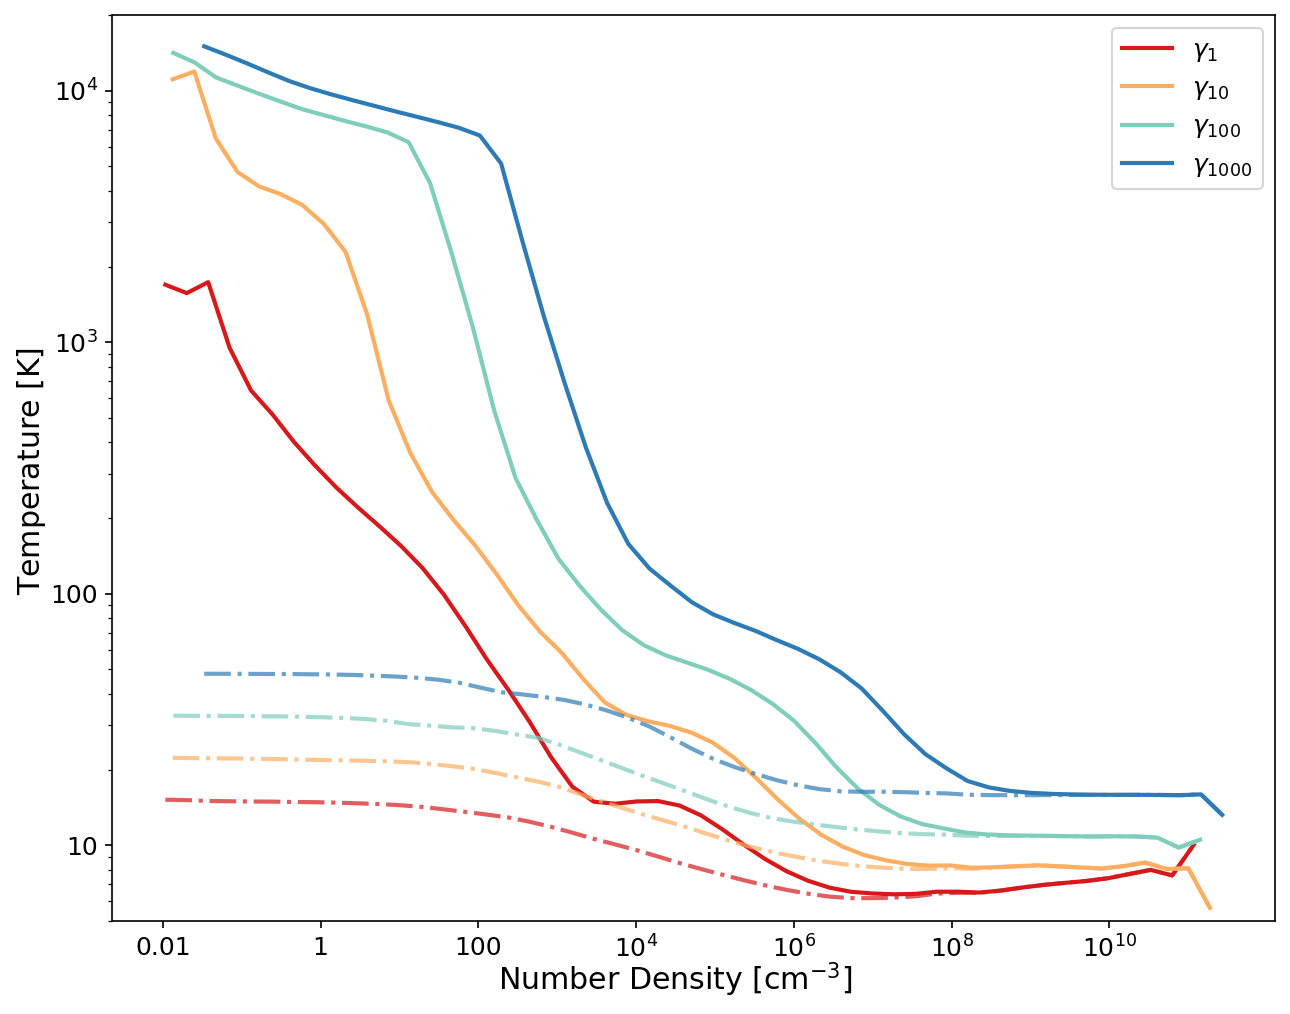

In [7]:
matplotlib.rcParams['font.size'] = 12.
matplotlib.rcParams['figure.dpi'] = 150
fig, ax = plt.subplots(1,1, figsize=(10,8))

# Plot the top panel
ax.plot(10**n1, 10**d1, c.colours()[0], linewidth=2, linestyle="-.", alpha=0.7)
l1, = ax.plot(10**n1, 10**t1, c.colours()[0], label="$\\gamma_1$", linewidth=2)
ax.plot(10**n10, 10**d10, c.colours()[1], linewidth=2, linestyle="-.", alpha=0.7)
l2, = ax.plot(10**n10, 10**t10, c.colours()[1], label="$\\gamma_{10}$", linewidth=2)
ax.plot(10**n100, 10**d100, c.colours()[3], linewidth=2, linestyle="-.", alpha=0.7)
l3, = ax.plot(10**n100, 10**t100,  c.colours()[3], label="$\\gamma_{100}$", linewidth=2)
ax.plot(10**n1000, 10**d1000, c.colours()[4], linewidth=2, linestyle="-.", alpha=0.7)
l4, = ax.plot(10**n1000, 10**t1000, c.colours()[4], label="$\\gamma_{1000}$", linewidth=2)

ax.legend(loc="upper right", handles=[l1,l2,l3,l4])
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_yticks([10, 100, 1000, 1e4], ["10", "100", "$10^3$", "$10^4$"])

# Add ticks and labels
ax.set_xticks([0.01, 1, 100, 1e4, 1e6, 1e8, 1e10], ["0.01", "1", "100", "$10^4$", "$10^6$", "$10^8$", "$10^{10}$"])

ax.set_ylim(5, 2e4)

fig.supylabel("Temperature [$\\rm K$]", x=0.06)
fig.supxlabel("Number Density [$\\rm {cm^{-3}}$]", y=0.06)

#### Full Double Panel Plot

Text(0.5, 0.08, 'Number Density [$\\rm {cm^{-3}}$]')

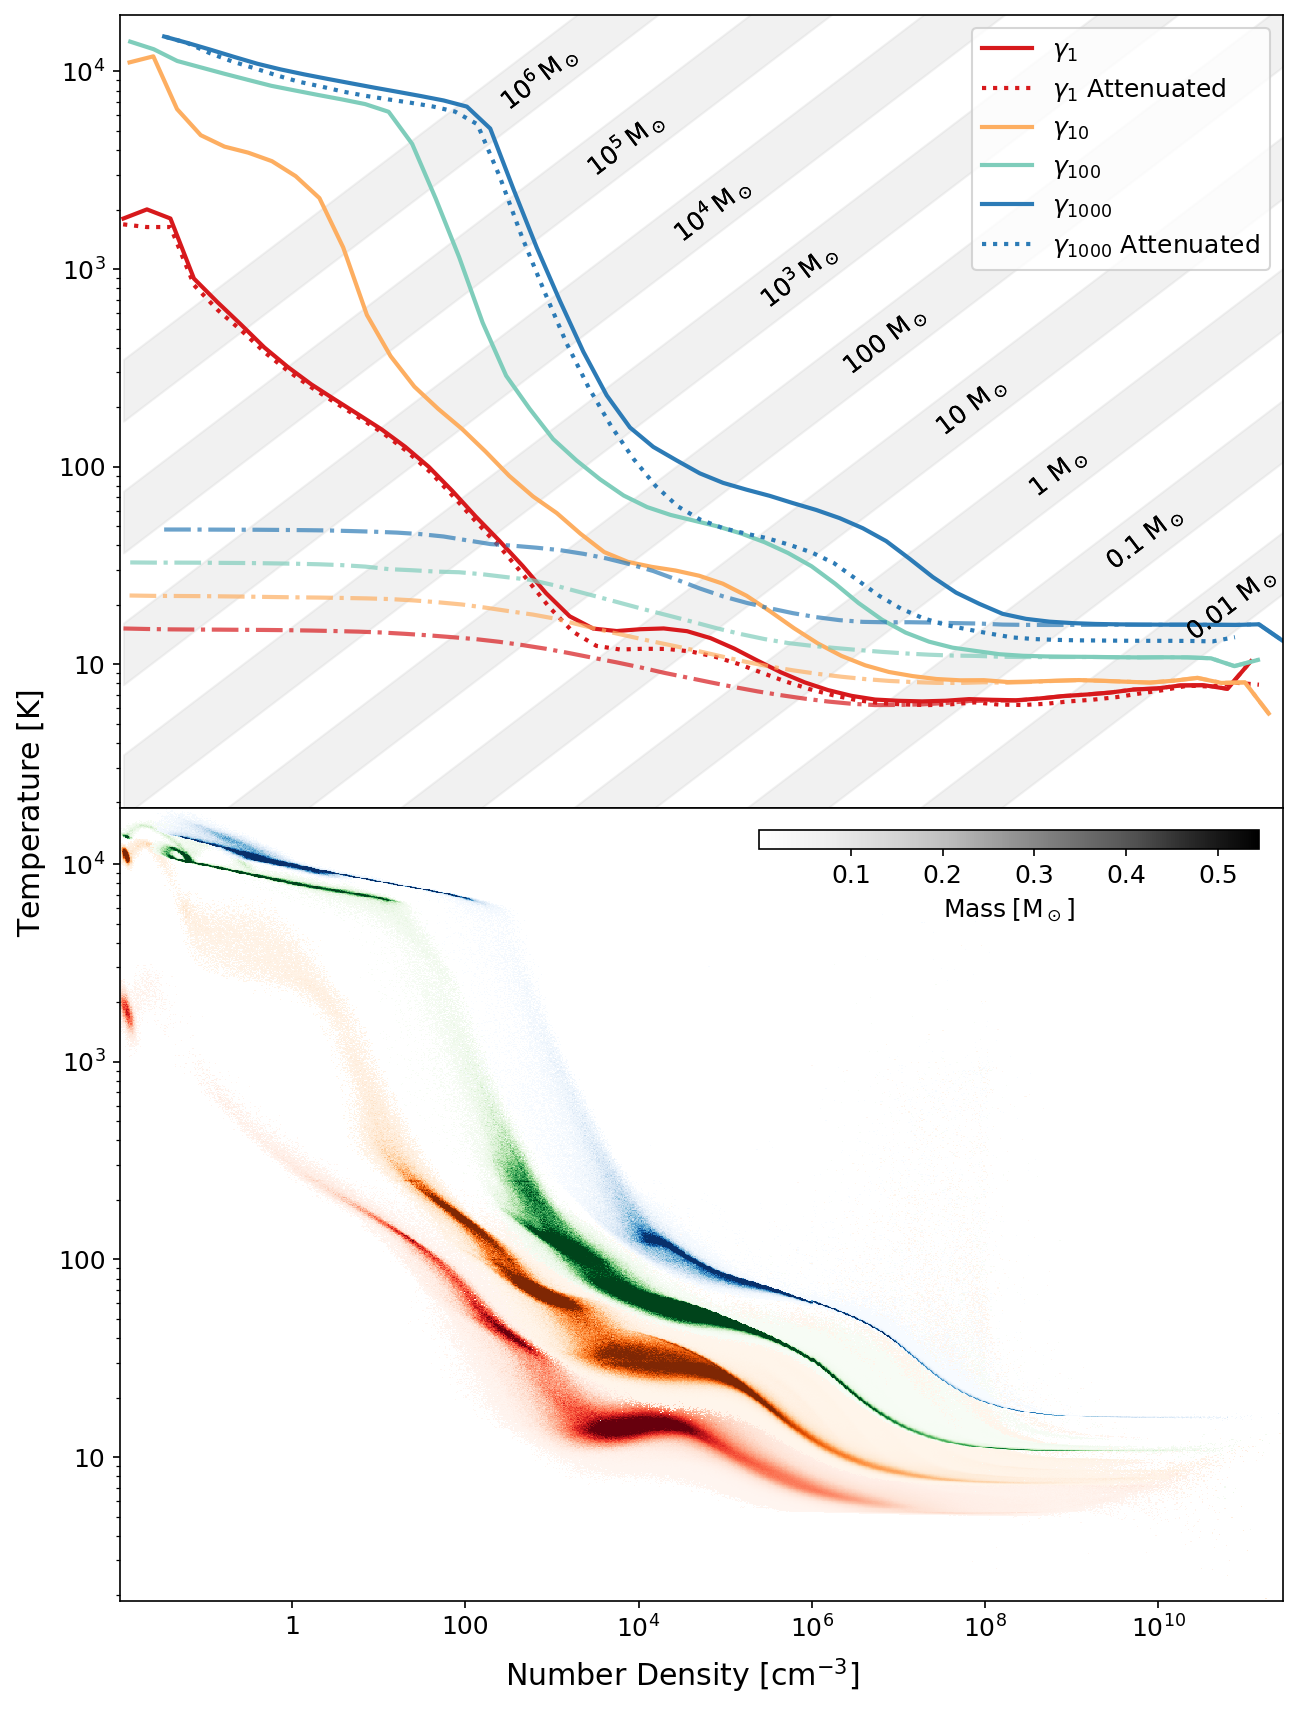

In [47]:
# Create the figure
fig, ax = plt.subplots(2,1, sharex=True, sharey=True, figsize=(10,14))
fig.subplots_adjust(hspace=0, wspace=0)
matplotlib.rcParams['font.size'] = 12.
matplotlib.rcParams['figure.dpi'] = 150

# Plot lines of constant Jeans Mass
n = 10**np.linspace(np.min(n1), 12, 100)
M = np.array([0.01, 0.1, 1, 10, 100, 1000, 10000, 1e5, 1e6])
labels = ["0.01 $\\rm M_\\odot$","0.1 $\\rm M_\\odot$", "1 $\\rm M_\\odot$", "10 $\\rm M_\\odot$", "100 $\\rm M_\\odot$", "$10^3 \\, \\rm M_\\odot$", "$10^4 \\, \\rm M_\\odot$", "$10^5 \\, \\rm M_\\odot$", "$10^6 \\, \\rm M_\\odot$"]
for i in range(len(M)):
    ax[0].fill_between(n, tFromMass(n, M[i]*1.991e33), tFromMass(n, M[i]*1.991e33, 1.4), color="lightgray", alpha=0.3)
    ax[0].plot(n, tFromMass(n, M[i]*1.991e33, 1.8), label=labels[i], color="lightgray", alpha=0.0, linestyle="--")

#labelLines(ax[0].get_lines(), zorder=2.5, xvals=[1e10, 1e9, 1e8, 1e7, 1e6, 1e5, 1e4, 1e3, 1e2], color="k")
#labelLines(ax[0].get_lines(), zorder=2.5, xvals=[1e11, 1e10, 1e9, 1e8, 1e7, 1e6, 1e5, 1e4, 1e3], color="k")
labelLines(ax[0].get_lines(), zorder=2.5, xvals=[7e10, 7e9, 7e8, 7e7, 7e6, 7e5, 7e4, 7e3, 7e2], color="k", outline_width=0)

# Plot the top panel
ax[0].plot(10**n1, 10**d1, c.colours()[0], linewidth=2, linestyle="-.", alpha=0.7)
l1, = ax[0].plot(10**n1, 10**t1, c.colours()[0], label="$\\gamma_1$", linewidth=2)
l1cr, = ax[0].plot(10**n1cr, 10**t1cr, c.colours()[0], linewidth=2, linestyle=":", label="$\\gamma_1$ Attenuated")

ax[0].plot(10**n10, 10**d10, c.colours()[1], linewidth=2, linestyle="-.", alpha=0.7)
l2, = ax[0].plot(10**n10, 10**t10, c.colours()[1], label="$\\gamma_{10}$", linewidth=2)

ax[0].plot(10**n100, 10**d100, c.colours()[3], linewidth=2, linestyle="-.", alpha=0.7)
l3, = ax[0].plot(10**n100, 10**t100,  c.colours()[3], label="$\\gamma_{100}$", linewidth=2)

ax[0].plot(10**n1000, 10**d1000, c.colours()[4], linewidth=2, linestyle="-.", alpha=0.7)
l4, = ax[0].plot(10**n1000, 10**t1000, c.colours()[4], label="$\\gamma_{1000}$", linewidth=2)
l4cr, = ax[0].plot(10**n1000cr, 10**t1000cr, c.colours()[4], linewidth=2, linestyle=":", label="$\\gamma_{1000}$ Attenuated")

ax[0].legend(loc="upper right", handles=[l1,l1cr,l2,l3,l4,l4cr])
ax[0].set_xscale("log")
ax[0].set_yscale("log")
ax[0].set_yticks([10, 100, 1000, 1e4], ["10", "100", "$10^3$", "$10^4$"])

# Create a common normalisation between the simulations
maxMasses = np.array([np.max(uv1.mass), np.max(uv10.mass), np.max(uv100.mass), np.max(uv1000.mass)])
minMasses = np.array([np.min(uv1.mass), np.min(uv10.mass), np.min(uv100.mass), np.min(uv1000.mass)])
totalNorm = matplotlib.colors.Normalize(vmin=np.min(minMasses)/1.991e33, vmax=10*np.max(maxMasses)/1.991e33, clip=False)

# Create log spaced bins for the histograms
xBins = np.linspace(np.log10(np.min(uv1.numberDensity)), np.log10(np.max(uv10.numberDensity)), 1000)
yBins = np.linspace(np.log10(np.min(uv1.gasTemp)), np.log10(np.max(uv1000.gasTemp)), 1000)
bins = (10**xBins, 10**yBins)

# Plot the histograms
h = ax[1].hist2d(uv1.numberDensity, uv1.gasTemp, weights=uv1.mass/c.uMass(), cmap="Reds", norm=totalNorm, cmin=0.0001, bins=bins)
h = ax[1].hist2d(uv10.numberDensity, uv10.gasTemp, weights=uv10.mass/c.uMass(), cmap="Oranges", norm=totalNorm, cmin=0.0001, bins=bins)
h = ax[1].hist2d(uv100.numberDensity, uv100.gasTemp, weights=uv100.mass/c.uMass(), cmap="Greens", norm=totalNorm, cmin=0.0001, bins=bins)
h = ax[1].hist2d(uv1000.numberDensity, uv1000.gasTemp, weights=uv1000.mass/c.uMass(), cmap="Blues", norm=totalNorm, cmin=0.0001, bins=bins)

cax = ax[1].inset_axes([0.55, 0.9475, 0.43, 0.025])
cbar = fig.colorbar(matplotlib.cm.ScalarMappable(norm=totalNorm, cmap="Greys"), cax=cax, orientation="horizontal")
cbar.set_label("$\\rm Mass \\: [M_\\odot]$")
cbar.set_ticks([0.1, 0.2, 0.3, 0.4, 0.5])

# Add ticks and labels
ax[1].set_xticks([0.01, 1, 100, 1e4, 1e6, 1e8, 1e10], ["0.01", "1", "100", "$10^4$", "$10^6$", "$10^8$", "$10^{10}$"])
ax[1].set_xlim(10**np.min(n1)-0.001, 1.01*10**np.max(n1000))

fig.supylabel("Temperature [$\\rm K$]", x=0.055)
fig.supxlabel("Number Density [$\\rm {cm^{-3}}$]", y=0.08)

## Chemistry Plots

In [6]:
# Extract chemistry variables
uv1.extractChemistry()
uv10.extractChemistry()
uv100.extractChemistry()
uv1000.extractChemistry()

In [7]:
def binAbundances(data, nBins=50):
    # Log density and work out bins
    numDense = np.log10(data.numberDensity)
    densityBins = np.linspace(np.min(numDense), np.max(numDense), nBins)

    # Arrays to store values
    hAbund = np.zeros((nBins-1, 3))
    cAbund = np.zeros((nBins-1, 3))
    densityMid = np.zeros(nBins-1)

    # Loop through bins and average
    for i in range(nBins-1):
        # Getting our bin ranges
        binMin = densityBins[i]
        binMax = densityBins[i+1]

        # Finding particles in this bin
        ind = np.where((numDense <= binMax) & (numDense >= binMin))    

        # Assigning chemical abundances
        hAbund[i,0] = np.average(data.H2[ind] * 2)
        hAbund[i,1] = np.average(data.HI[ind])
        hAbund[i,2] = np.average(data.H[ind])
        
        cAbund[i,0] = np.average(data.C[ind])
        cAbund[i,1] = np.average(data.CI[ind])
        cAbund[i,2] = np.average(data.CO[ind])

        densityMid[i] = (binMax + binMin) / 2

    return densityMid, hAbund, cAbund

In [8]:
# Bin stuff
n1, t1 = binTemperatureDensity(uv1.gasTemp, uv1.numberDensity, uv1.mass, 50)
n, hAbund1, cAbund1 = binAbundances(uv1, 50)
n10, t10 = binTemperatureDensity(uv10.gasTemp, uv10.numberDensity, uv10.mass, 50)
n, hAbund10, cAbund10 = binAbundances(uv10, 50)
n100, t100 = binTemperatureDensity(uv100.gasTemp, uv100.numberDensity, uv100.mass, 50)
n, hAbund100, cAbund100 = binAbundances(uv100, 50)
n1000, t1000 = binTemperatureDensity(uv1000.gasTemp, uv1000.numberDensity, uv1000.mass, 50)
n, hAbund1000, cAbund1000 = binAbundances(uv1000, 50)

Text(0.5, 0.069, 'Number Density [$\\rm cm^{-3}$]')

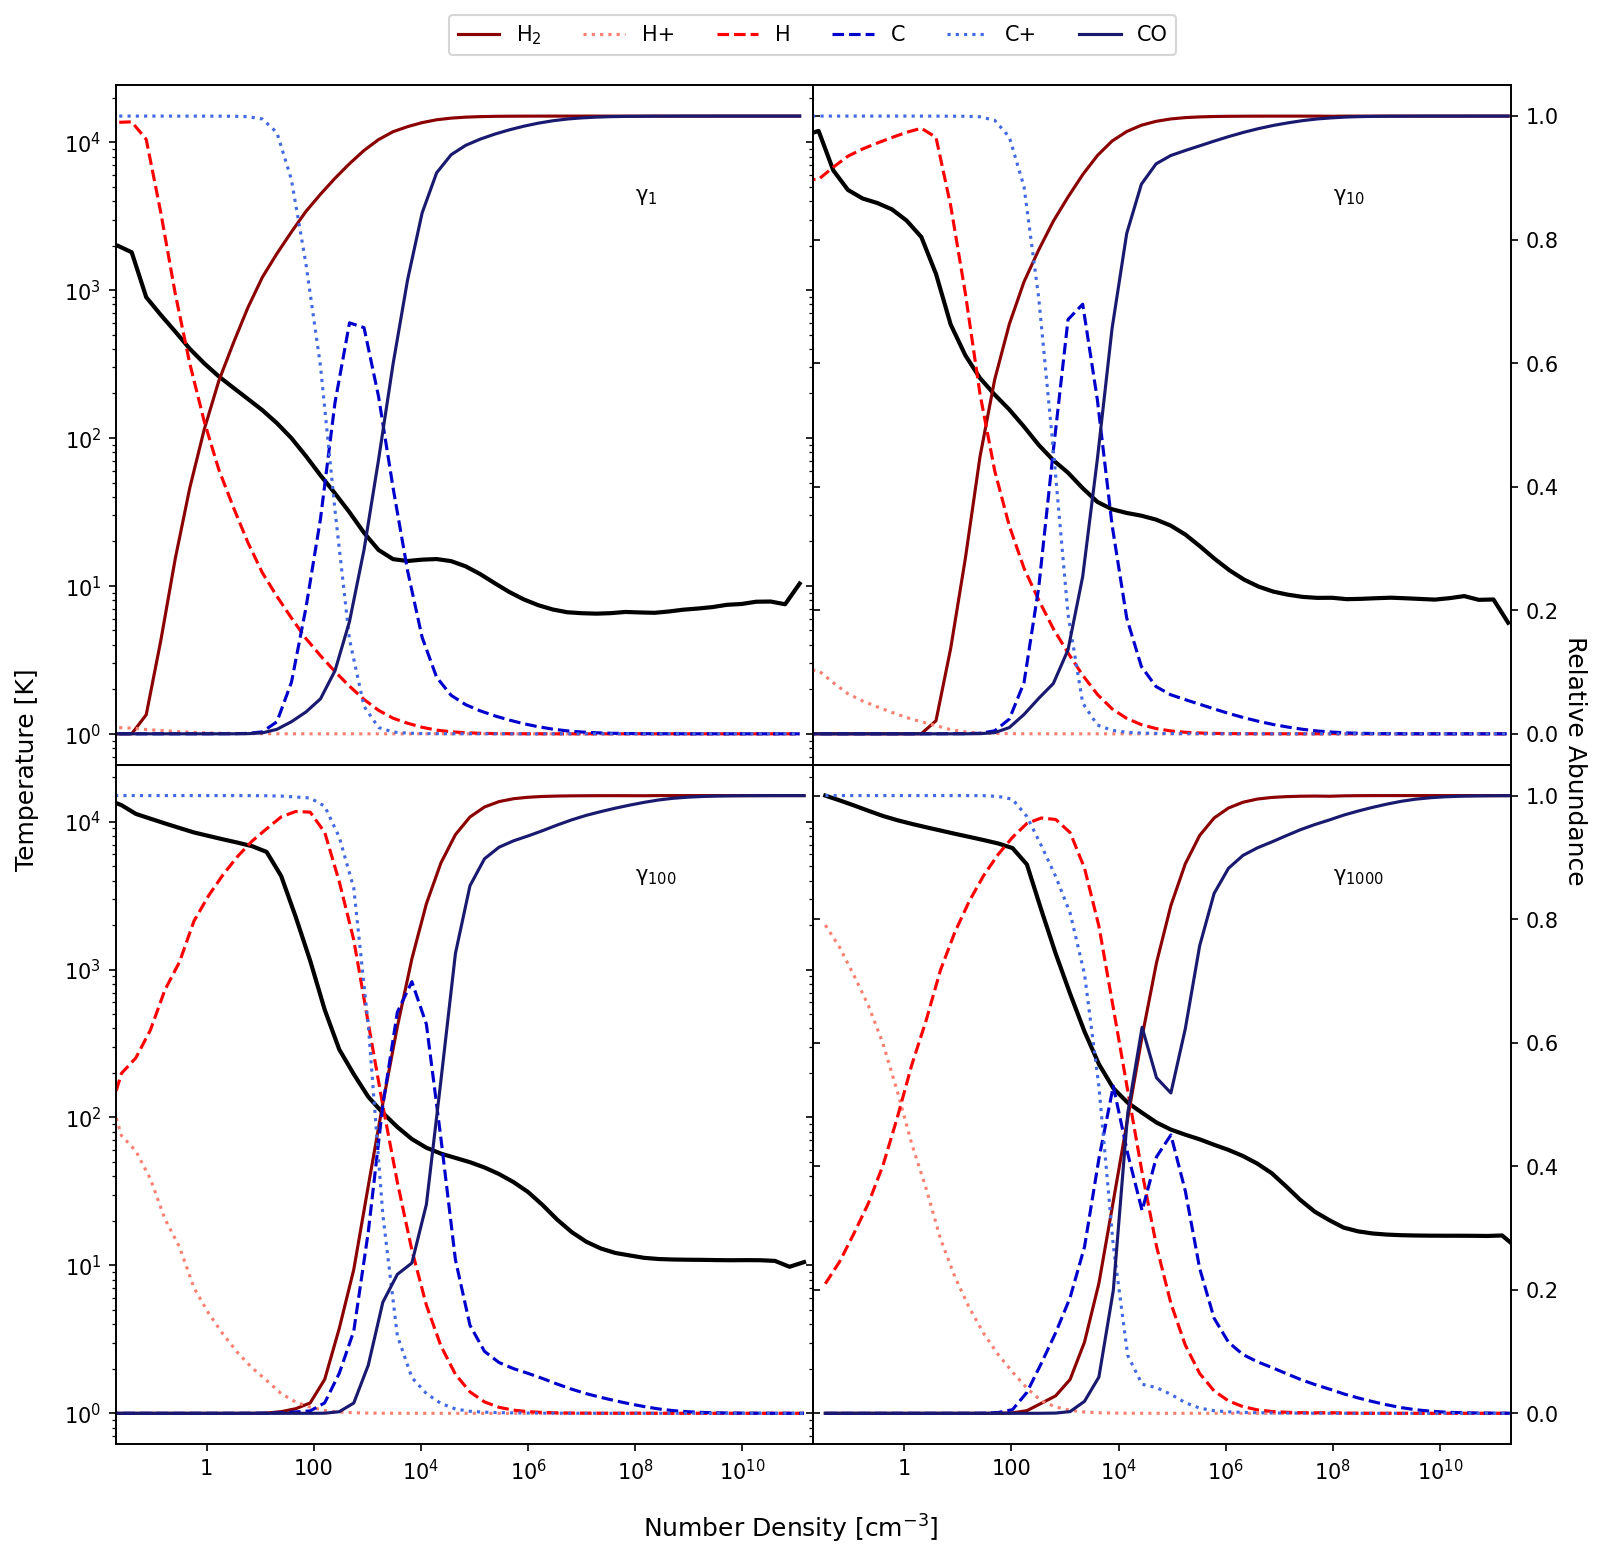

In [13]:
fig, axs = plt.subplots(2,2, figsize=(12,12), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0, wspace=0)

densities = np.array([[n1, n10], [n100, n1000]], dtype=object)
temps = np.array([[t1, t10], [t100, t1000]], dtype=object)
abunds = np.array([[hAbund1, hAbund10], [hAbund100, hAbund1000]], dtype=object)
cAbunds = np.array([[cAbund1/1.4e-4, cAbund10/1.4e-4], [cAbund100/1.4e-4, cAbund1000/1.4e-4]], dtype=object)
labels = np.array([["$\\rm \\gamma_1$", "$\\rm \\gamma_{10}$"], ["$\\rm \\gamma_{100}$", "$\\rm \\gamma_{1000}$"]])
#colours = np.array([[c.colours()[0], c.colours()[1]], [c.colours()[3], c.colours()[4]]])

for i in range(2):
    for j in range(2):
        ax = axs[i,j]
        ax.plot(10**densities[i,j], 10**temps[i,j], color="k", linewidth=2)

        ax2 = ax.twinx()
        ax2.plot(10**densities[i,j], abunds[i,j][:,0], color="darkred", linewidth=1.5)
        ax2.plot(10**densities[i,j], abunds[i,j][:,1], color="salmon", linewidth=1.5, linestyle=":")
        ax2.plot(10**densities[i,j], abunds[i,j][:,2], color="red", linewidth=1.5, linestyle="--")

        ax2.plot(10**densities[i,j], cAbunds[i,j][:,0], color="mediumblue", linewidth=1.5, linestyle="--")
        ax2.plot(10**densities[i,j], cAbunds[i,j][:,1], color="royalblue", linewidth=1.5, linestyle=":")
        ax2.plot(10**densities[i,j], cAbunds[i,j][:,2], color="midnightblue", linewidth=1.5)
        
        ax.text(1e8, 4e3, labels[i,j])

        if j == 1:
            pass
        else:
            ax2.set_yticklabels([])

# Dummy lines for neutral legend
H2, = axs[0,1].plot(0, 1, color="darkred", alpha=1, label="$\\rm H_2$")
HI, = axs[0,1].plot(0, 1, color="salmon",  linestyle=":", alpha=1, label="H+")
H, = axs[0,1].plot(0, 1, color="red", linestyle="--", alpha=1, label="H")
C, = axs[0,1].plot(0, 1, color="mediumblue", linestyle="--", label="C")
CI, = axs[0,1].plot(0, 1, color="royalblue", linestyle=":", label="C+")
CO, = axs[0,1].plot(0, 1, color="midnightblue", label="CO")
a = [H2, HI, H, C, CI, CO]

fig.legend(handles=a, ncols=6, fontsize="medium", bbox_to_anchor=(0.72,0.925))

axs[0,0].set_xscale("log")
axs[0,0].set_yscale("log")
axs[0,0].set_xlim(0.02,2.1e11)

axs[0,0].set_xticks([1, 100, 1e4, 1e6, 1e8, 1e10], ["1", "100", "$10^4$", "$10^6$", "$10^8$", "$10^{10}$"])
axs[1,1].text(2e12, 4e3, "Relative Abundance", rotation=270, fontsize=12)

fig.supylabel("Temperature [K]", x=0.069)
fig.supxlabel("Number Density [$\\rm cm^{-3}$]", y=0.069)


## Heating and Cooling Rates

In [ ]:
# Load snapshots containing the rates
uv1 = readAREPO("/postProcessing/standardRunRates/cloudUV1_019.hdf5", 1)
uv1.extractRates()
uv10 = readAREPO("/postProcessing/standardRunRates/cloudUV10_025.hdf5", 1)
uv10.extractRates()
uv100 = readAREPO("/postProcessing/standardRunRates/cloudUV100_038.hdf5", 1)
uv100.extractRates()
uv1000 = readAREPO("/postProcessing/standardRunRates/cloudUV1000_042.hdf5", 1)
uv1000.extractRates()

In [ ]:
uv1cr = readAREPO("/postProcessing/cloudUV1_019.hdf5", 1)
uv1cr.extractRates()
uv1000cr = readAREPO("/postProcessing/cloudUV1000_036.hdf5", 1)
uv1000cr.extractRates()

#### Only Attenuated Plot

Text(0.025, 0.04, 'pdV')

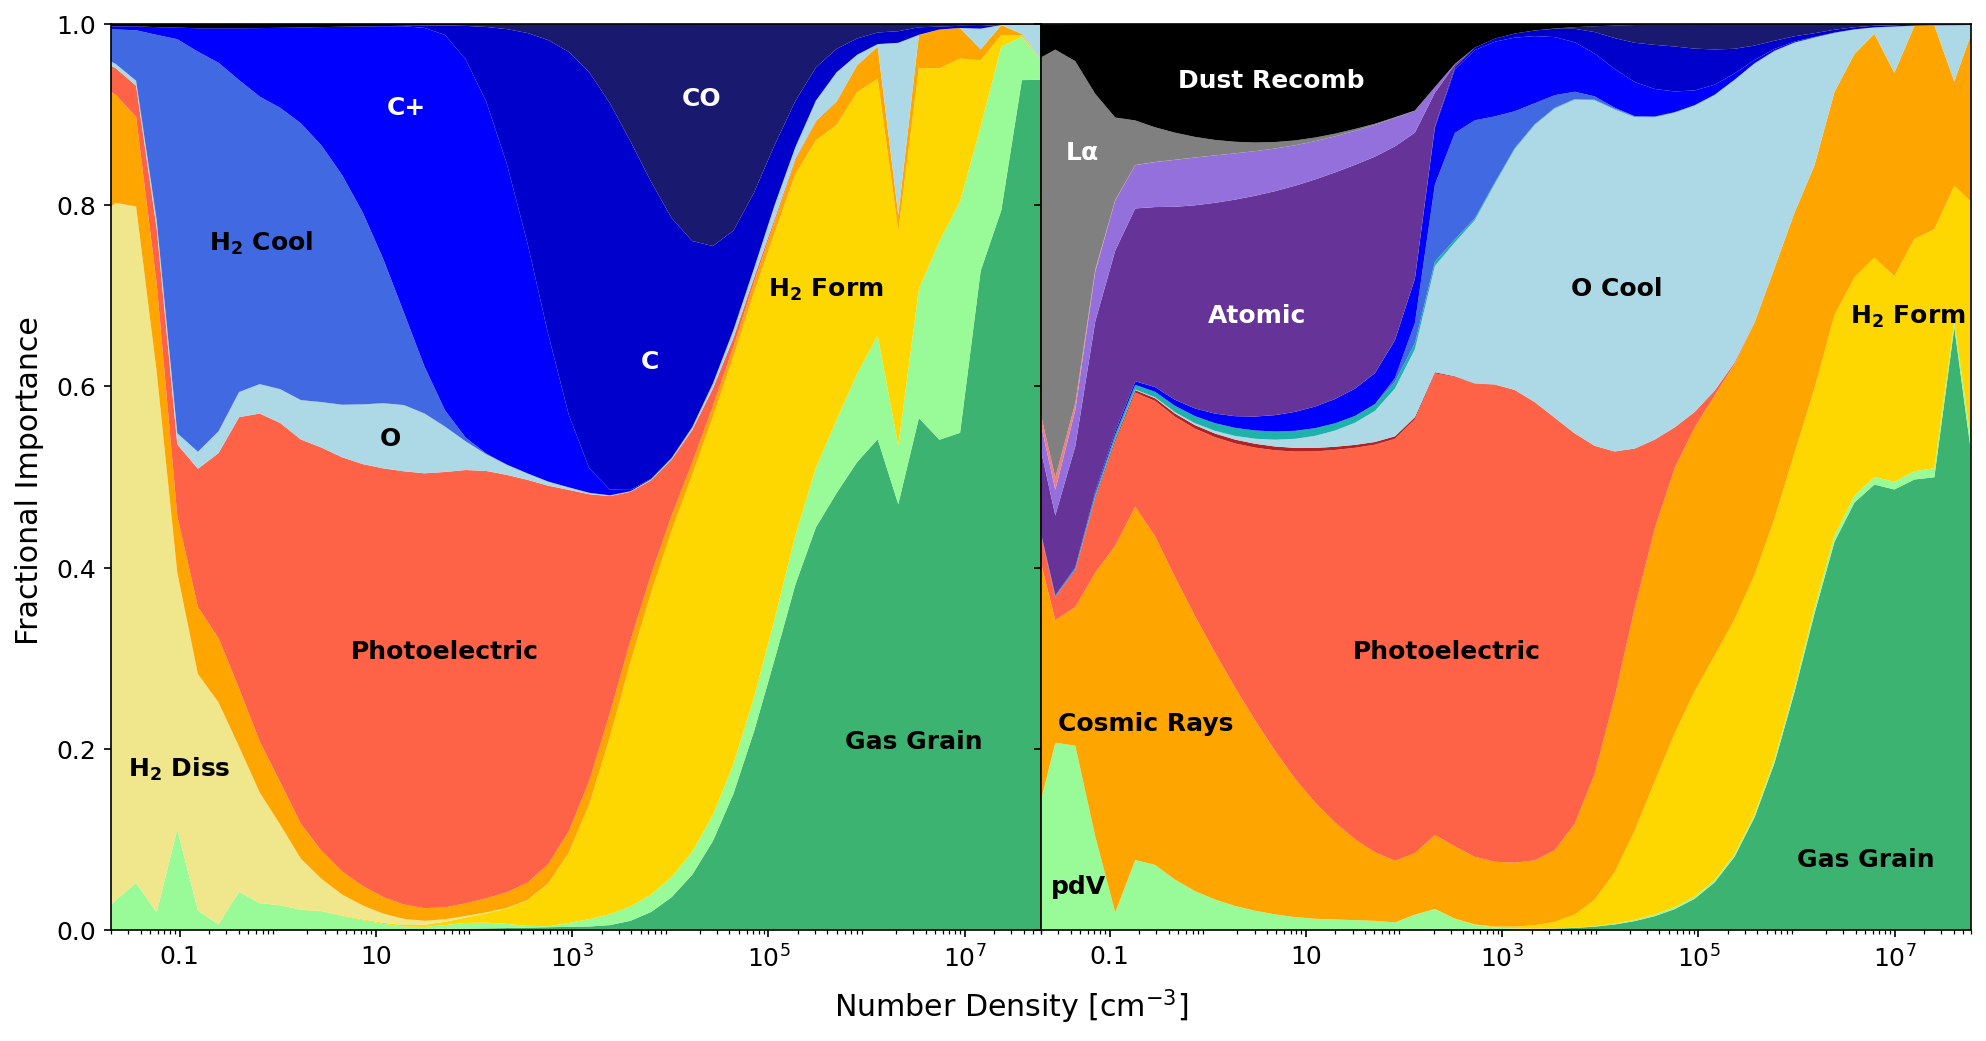

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0, wspace=0)

cols = ["mediumseagreen", "palegreen", "gold", "khaki", "orange", "tomato", "firebrick", "lightblue", "lightseagreen", "royalblue", "blue", "mediumblue","midnightblue", "rebeccapurple", "mediumpurple", "lightcoral", "grey", "black"]

# Calculate and plot rates for UV1
b, r, l, c = plotHealCoolRates(uv1cr, normalised=True, nBins=50)
a = axs[0].stackplot(b, r, labels=l, colors=cols)

# Calculate and plot rates for UV1000
b, r, l, c = plotHealCoolRates(uv1000cr, normalised=True, nBins=50)
a = axs[1].stackplot(b, r, labels=l, colors=cols)

axs[0].set_xscale("log")
axs[0].set_xlim(2e-2, 6e7)
axs[0].set_ylim(0, 1)
axs[0].set_xticks([1e-1, 10, 1e3, 1e5, 1e7], ["0.1", "10", "$10^3$", "$10^5$", "$10^7$"])

fig.supylabel("Fractional Importance", x=0.085)
fig.supxlabel("Number Density [$\\rm cm^{-3}$]", y=0.045)

axs[0].text(6e5, 0.2, "Gas Grain", color="black", fontsize="medium", fontweight="bold")
axs[0].text(1e5, 0.7, "$\\rm \\mathbf{H_2}$ Form", color="black", fontsize="medium", fontweight="bold")
axs[0].text(0.03, 0.17, "$\\rm \\mathbf{H_2}$ Diss", color="black", fontsize="medium", fontweight="bold")
axs[0].text(5.5, 0.3, "Photoelectric", color="black", fontsize="medium", fontweight="bold")
axs[0].text(11, 0.535, "O", color="black", fontsize="medium", fontweight="bold")
axs[0].text(0.2, 0.75, "$\\rm \\mathbf{H_2}$ Cool", fontsize="medium", fontweight="bold")
axs[0].text(13, 0.9, "C+", color="white", fontsize="medium", fontweight="bold")
axs[0].text(5e3, 0.62, "C", color="white", fontsize="medium", fontweight="bold")
axs[0].text(1.3e4, 0.91, "CO", color="white", fontsize="medium", fontweight="bold")
#axs[0].text(3.2e6, 0.6, "pdV", color="black", fontsize="medium", fontweight="bold")

axs[1].text(1e6, 0.07, "Gas Grain", color="black", fontsize="medium", fontweight="bold")
axs[1].text(3.5e6, 0.67, "$\\rm \\mathbf{H_2}$ Form", color="black", fontsize="medium", fontweight="bold")
axs[1].text(0.03, 0.22, "Cosmic Rays", color="black", fontsize="medium", fontweight="bold")
axs[1].text(30, 0.3, "Photoelectric", color="black", fontsize="medium", fontweight="bold")
axs[1].text(5e3, 0.7, "O Cool", color="black", fontsize="medium", fontweight="bold")
axs[1].text(1, 0.67, "Atomic", color="white", fontsize="medium", fontweight="bold")
axs[1].text(0.035, 0.85, "$\\rm \\mathbf{L\\alpha}$", color="white", fontsize="medium", fontweight="bold")
axs[1].text(0.5, 0.93, "Dust Recomb",  color="white", fontsize="medium", fontweight="bold")
axs[1].text(0.025, 0.04, "pdV",  color="black", fontsize="medium", fontweight="bold")

#### Standard Clouds

Text(0.8, 0.95, 'Dust Recomb')

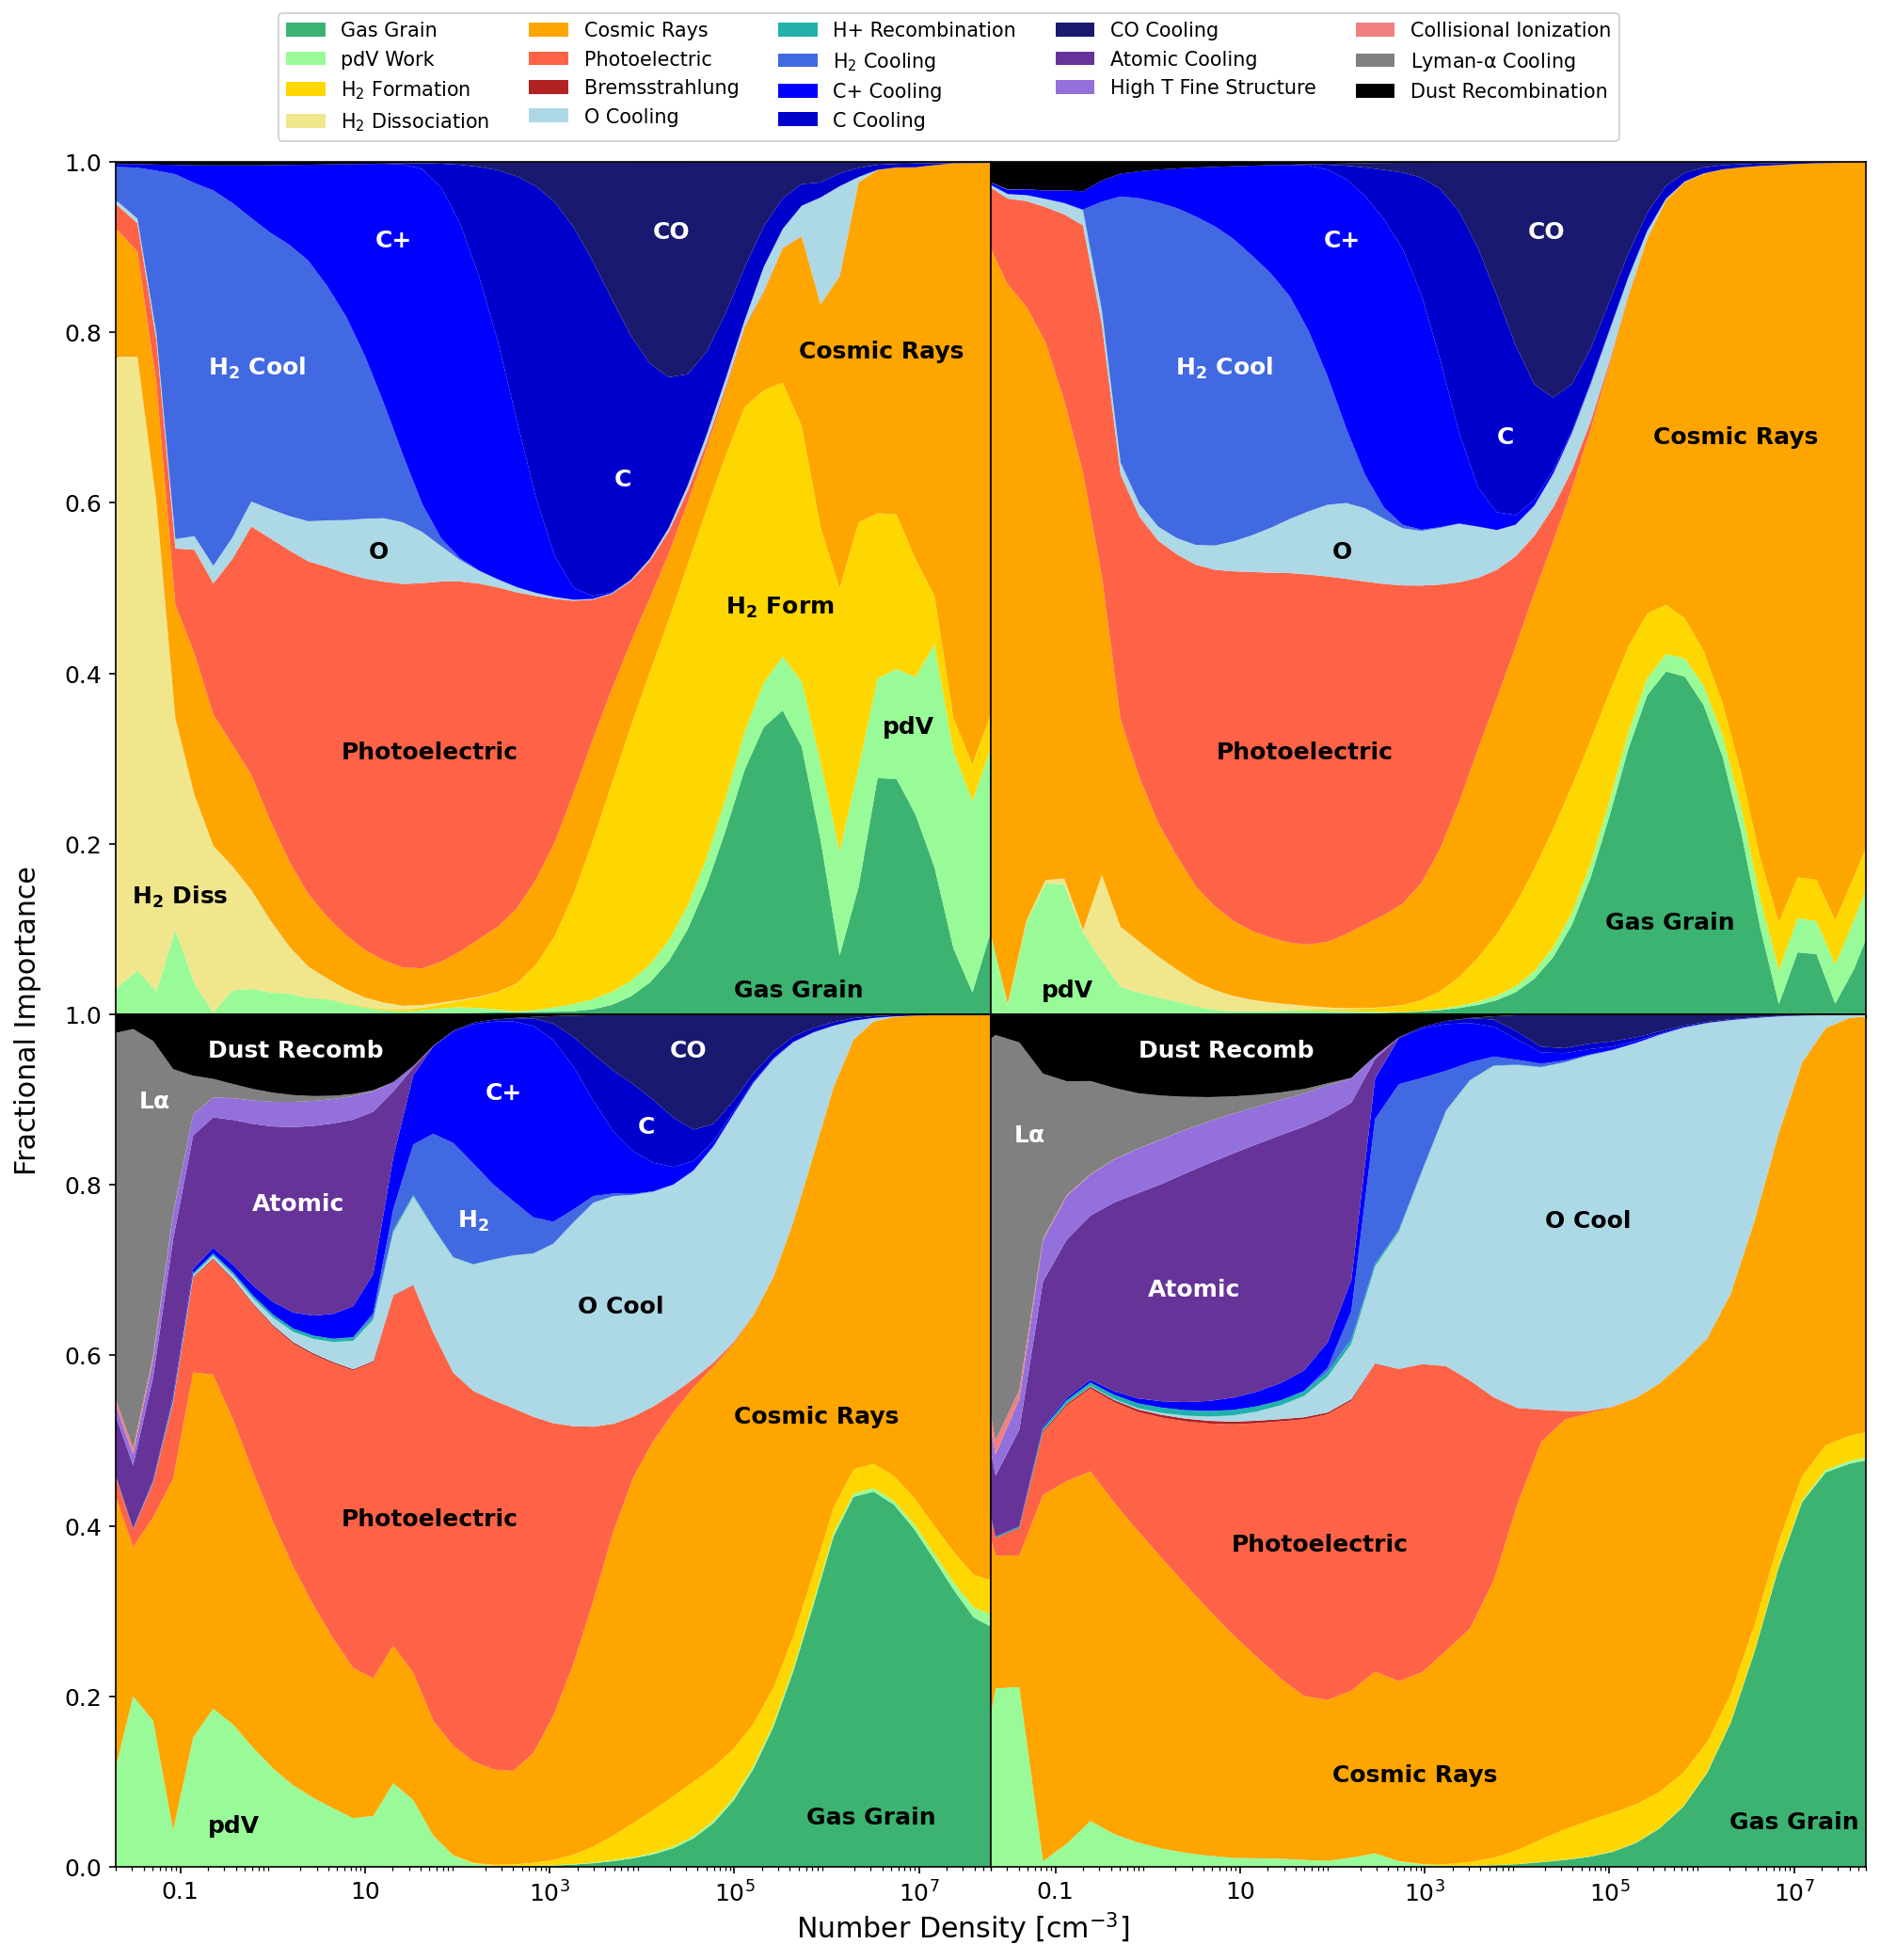

In [22]:
# Setup figure
matplotlib.rcParams['figure.dpi'] = 150
matplotlib.rcParams['font.size'] = 12.

fig, axs = plt.subplots(2,2, figsize=(16, 16), sharex=True)
fig.subplots_adjust(hspace=0, wspace=0)

data = [uv1, uv10, uv100, uv1000]
xs = [0,0,1,1]
ys = [0,1,0,1]

cols = ["mediumseagreen", "palegreen", "gold", "khaki", 
        "orange", "tomato", "firebrick", "lightblue", 
        "lightseagreen", "royalblue", "blue", "mediumblue",
        "midnightblue", "rebeccapurple", "mediumpurple", 
        "lightcoral", "grey", "black"]

for i in range(4):
   # b, r, l, _ = data[i].plotHealCoolRates(normalised=True)
    b, r, l, c = plotHealCoolRates(data[i], normalised=True, nBins=50)
    a = axs[xs[i], ys[i]].stackplot(b, r, labels=l, colors=cols)

    axs[xs[i], ys[i]].set_ylim(0,1)
    axs[xs[i], ys[i]].set_yticks([])

# Format the figure
axs[0,0].set_xscale("log")
axs[0,0].set_xlim(2e-2, 6e7)
axs[0,0].set_ylim(0, 1)
axs[0,0].set_xticks([1e-1, 10, 1e3, 1e5, 1e7], ["0.1", "10", "$10^3$", "$10^5$", "$10^7$"])

axs[0,0].set_yticks([0.2, 0.4, 0.6, 0.8, 1])
axs[1,0].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])

fig.supxlabel("Number Density [$\\rm cm^{-3}$]", y=0.09)
fig.supylabel("Fractional Importance", x=0.08)
fig.legend(handles=a, ncols=5, fontsize="small", bbox_to_anchor=(0.795,0.95))

# Process text labels
axs[0,0].text(1e5, 0.02, "Gas Grain", color="black", fontsize="medium", fontweight="bold")
axs[0,0].text(4e6, 0.33, "pdV",  color="black", fontsize="medium", fontweight="bold")
axs[0,0].text(8e4, 0.47, "$\\rm \\mathbf{H_2}$ Form", color="black", fontsize="medium", fontweight="bold")
axs[0,0].text(0.03, 0.13, "$\\rm \\mathbf{H_2}$ Diss", color="black", fontsize="medium", fontweight="bold")
axs[0,0].text(5e5, 0.77, "Cosmic Rays",  color="black", fontsize="medium", fontweight="bold")
axs[0,0].text(5.5, 0.3, "Photoelectric", color="black", fontsize="medium", fontweight="bold")
axs[0,0].text(11, 0.535, "O", color="black", fontsize="medium", fontweight="bold")
axs[0,0].text(0.2, 0.75, "$\\rm \\mathbf{H_2}$ Cool", color="white", fontsize="medium", fontweight="bold")
axs[0,0].text(13, 0.9, "C+",  color="white", fontsize="medium", fontweight="bold")
axs[0,0].text(5e3, 0.62, "C",  color="white", fontsize="medium", fontweight="bold")
axs[0,0].text(1.3e4, 0.91, "CO",  color="white", fontsize="medium", fontweight="bold")

axs[0,1].text(9e4, 0.1, "Gas Grain",  color="black", fontsize="medium", fontweight="bold")
axs[0,1].text(0.07, 0.02, "pdV", color="black", fontsize="medium", fontweight="bold")
axs[0,1].text(3e5, 0.67, "Cosmic Rays", color="black", fontsize="medium", fontweight="bold")
axs[0,1].text(5.5, 0.3, "Photoelectric", color="black", fontsize="medium", fontweight="bold")
axs[0,1].text(1e2, 0.535, "O", color="black", fontsize="medium", fontweight="bold")
axs[0,1].text(2, 0.75, "$\\rm \\mathbf{H_2}$ Cool", color="white", fontsize="medium", fontweight="bold")
axs[0,1].text(8e1, 0.9, "C+", color="white", fontsize="medium", fontweight="bold")
axs[0,1].text(6e3, 0.67, "C", color="white", fontsize="medium", fontweight="bold")
axs[0,1].text(1.3e4, 0.91, "CO", color="white", fontsize="medium", fontweight="bold")

axs[1,0].text(6e5, 0.05, "Gas Grain",  color="black", fontsize="medium", fontweight="bold")
axs[1,0].text(0.2, 0.04, "pdV", color="black", fontsize="medium", fontweight="bold")
axs[1,0].text(1e5, 0.52, "Cosmic Rays", color="black", fontsize="medium", fontweight="bold")
axs[1,0].text(5.5, 0.4, "Photoelectric",  color="black", fontsize="medium", fontweight="bold")
axs[1,0].text(2e3, 0.65, "O Cool",  color="black", fontsize="medium", fontweight="bold")
axs[1,0].text(1e2, 0.75, "$\\rm \\mathbf{H_2}$", color="white", fontsize="medium", fontweight="bold")
axs[1,0].text(2e2, 0.9, "C+",color="white", fontsize="medium", fontweight="bold")
axs[1,0].text(9e3, 0.86, "C", color="white", fontsize="medium", fontweight="bold")
axs[1,0].text(2e4, 0.95, "CO", color="white", fontsize="medium", fontweight="bold")
axs[1,0].text(0.6, 0.77, "Atomic", color="white", fontsize="medium", fontweight="bold")
axs[1,0].text(0.035, 0.89, "$\\rm \\mathbf{L\\alpha}$", color="white", fontsize="medium", fontweight="bold")
axs[1,0].text(0.2, 0.95, "Dust Recomb",color="white", fontsize="medium", fontweight="bold")

axs[1,1].text(2e6, 0.045, "Gas Grain",  color="black", fontsize="medium", fontweight="bold")
#axs[1,1].text(0.035, 0.02, "pdV", color="palegreen", fontsize="small", path_effects=[pe.withStroke(linewidth=3, foreground="black")])
axs[1,1].text(1e2, 0.1, "Cosmic Rays",  color="black", fontsize="medium", fontweight="bold")
axs[1,1].text(8, 0.37, "Photoelectric",  color="black", fontsize="medium", fontweight="bold")
axs[1,1].text(2e4, 0.75, "O Cool",  color="black", fontsize="medium", fontweight="bold")
axs[1,1].text(1, 0.67, "Atomic", color="white", fontsize="medium", fontweight="bold")
axs[1,1].text(0.035, 0.85, "$\\rm \\mathbf{L\\alpha}$", color="white", fontsize="medium", fontweight="bold")
axs[1,1].text(0.8, 0.95, "Dust Recomb", color="white", fontsize="medium", fontweight="bold")

#### Line Plots

In [ ]:
# Plot the fractional heating and cooling rates
def plotHealCoolRates(data, nBins=100, normalised=False):
    # Create bins 
    rates = np.zeros((nBins, np.shape(data.rates)[1]+1))
    densityBins = 10**np.linspace(np.log10(np.min(data.numberDensity))+0.0001, np.log10(np.max(data.numberDensity))-0.0001, nBins+1)

    # Loop through each density bin
    for i in range(nBins):
        inBin = np.where((data.numberDensity > densityBins[i]) & (data.numberDensity <= densityBins[i+1]))

        # Pass if we've got an empty bin
        if len(inBin[0]) == 0:
            rates[i] = rates[i-1]
        else:
            # Extract each of the rates from the rates array
            for j in range(np.shape(data.rates)[1]):
                rates[i,j] = np.abs(np.sum(data.rates[:,j][inBin] * data.mass[inBin] / data.rho[inBin]))

            # Add in the pdV work term
            rates[i,np.shape(data.rates)[1]] = np.abs(np.sum((5/3 - 1) * data.velocityDivergence[inBin] * (36447.2682 / 1e17) * data.mass[inBin] * data.u[inBin]))

        if normalised:
            rates[i] = rates[i] / np.sum(rates[i])    

    # Plot the data
    labels = ["Gas Grain", "pdV Work", "$\\rm H_2$ Formation", "$\\rm H_2$ Dissociation", "Cosmic Rays", "Photoelectric","Bremsstrahlung", "O Cooling", "H+ Recombination", "$\\rm H_2$ Cooling", "C+ Cooling", "C Cooling", "CO Cooling", "Atomic Cooling", "High T Fine Structure", "Collisional Ionization", "Lyman-$\\rm \\alpha$ Cooling", "Dust Recombination"]
    colours = ["green", "lightgreen", "gold", "darkorange", "orange", "red", "darkred", "lightblue",  "cornflowerblue", "royalblue", "blue", "mediumblue", "darkblue", "slateblue", "mediumpurple", "purple", "gray", "black"]
    ratArr = [rates[:,0], rates[:,-1], rates[:,15], (rates[:,12]+rates[:,13]), rates[:,6], rates[:,7], rates[:,5], rates[:,8], rates[:,17], rates[:,1], rates[:,9], rates[:,-2], (rates[:,18]+rates[:,19]+rates[:,20]), rates[:,2],  rates[:,11], rates[:,16], rates[:,3], rates[:,10]]
        
    return (densityBins[1:]+densityBins[:-1])/2, ratArr, labels, colours

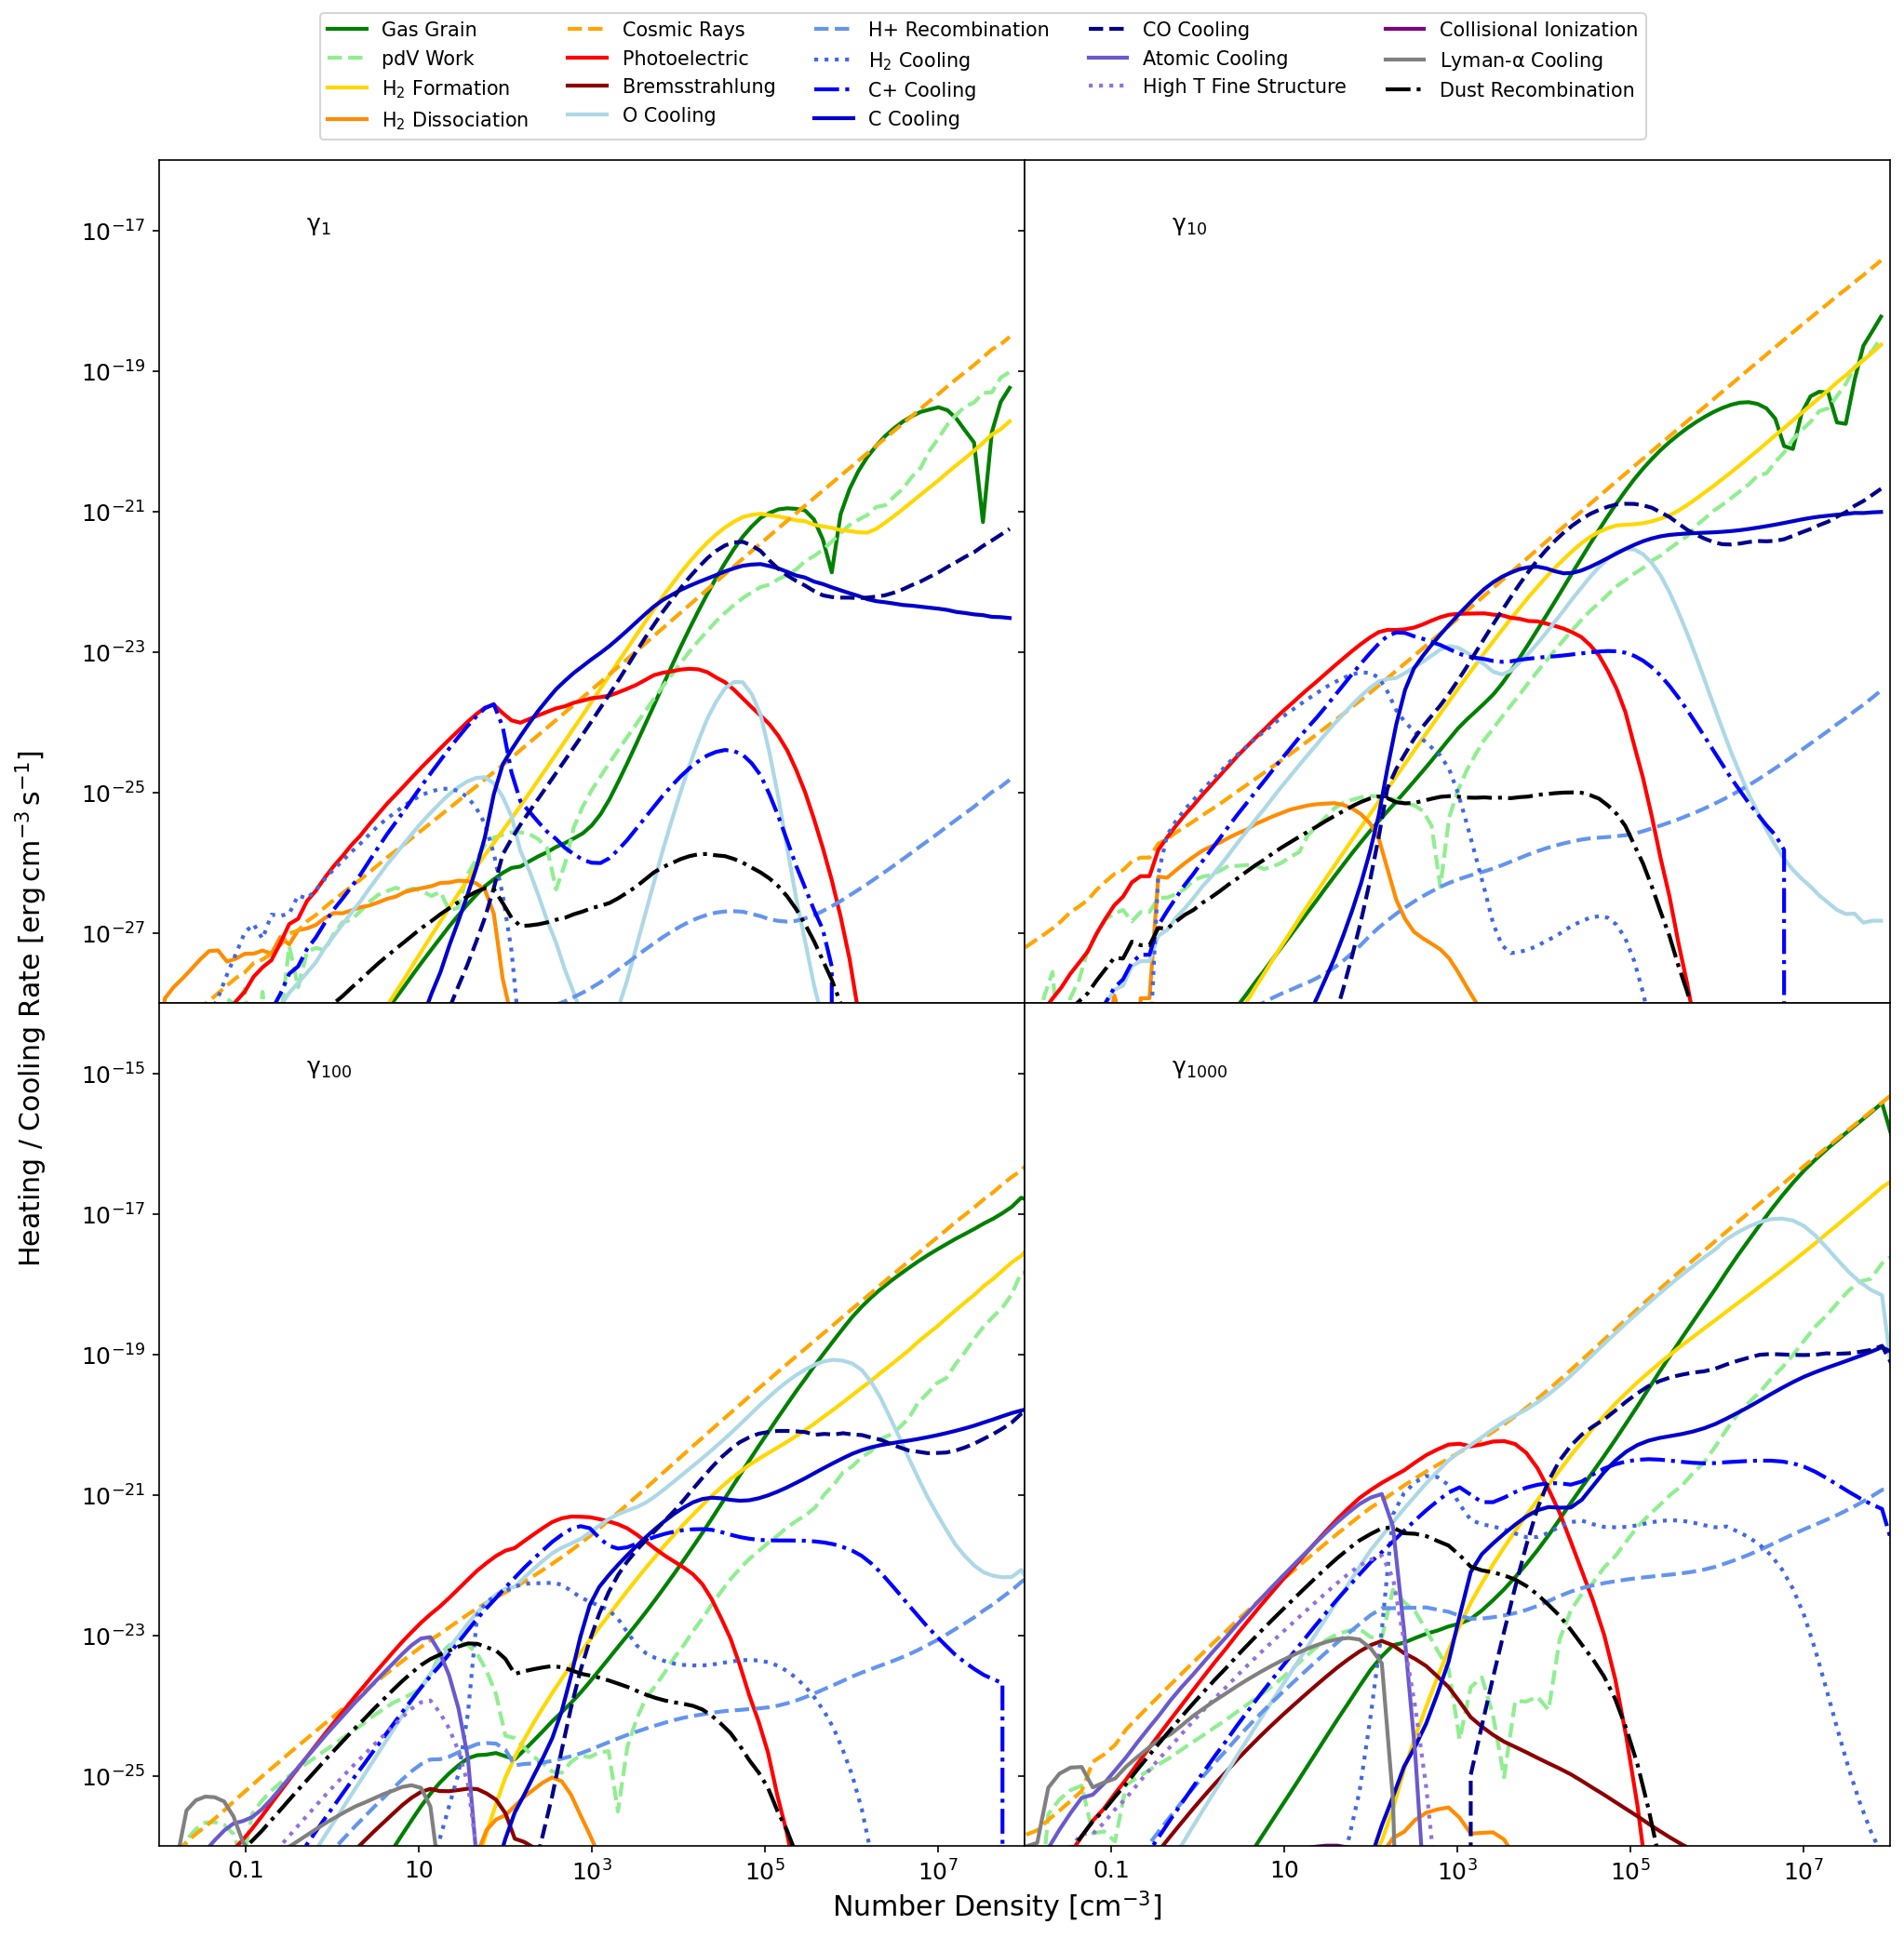

In [6]:
# Setup figure
matplotlib.rcParams['figure.dpi'] = 150
matplotlib.rcParams['font.size'] = 12.

fig, axs = plt.subplots(2,2, figsize=(16, 16), sharex=True)
fig.subplots_adjust(hspace=0, wspace=0)

data = [uv1, uv10, uv100, uv1000]
xs = [0,0,1,1]
ys = [0,1,0,1]

labelSim = ["$\\rm \\gamma_1$", "$\\rm \\gamma_{10}$", "$\\rm \\gamma_{100}$", "$\\rm \\gamma_{1000}$"]
linestyles = ["-", "--", "-", "-", "--", "-", "-", "-", "--", ":", "-.", "-", "--", "-", ":", "-", "-", "-."]

for i in range(4):
    b, r, l, c = data[i].plotHealCoolRates(normalised=False)

    lines = []

    for j in range(len(l)):
        line, = axs[xs[i], ys[i]].plot(b, r[j], label=l[j], color=c[j], linewidth=2, linestyle=linestyles[j])

        lines.append(line)
    ax = axs[xs[i], ys[i]]
    
    if i <=1:
        ax.text(0.5, 1e-17, labelSim[i])
    else:
        ax.text(0.5, 1e-15, labelSim[i])
        
# Format the figure
axs[0,0].set_xscale("log")
axs[0,0].set_xlim(1e-2, 1e8)
axs[0,0].set_xticks([1e-1, 10, 1e3, 1e5, 1e7], ["0.1", "10", "$10^3$", "$10^5$", "$10^7$"])

axs[0,0].set_yscale("log")
axs[0,1].set_yscale("log")
axs[0,0].set_ylim(1e-28, 1e-16)
axs[0,1].set_ylim(1e-28, 1e-16)

axs[1,0].set_yscale("log")
axs[1,1].set_yscale("log")
axs[1,0].set_ylim(1e-26, 1e-14)
axs[1,1].set_ylim(1e-26, 1e-14)

axs[0,0].set_yticks([1e-27, 1e-25, 1e-23, 1e-21, 1e-19, 1e-17])
axs[0,1].set_yticks([1e-27, 1e-25, 1e-23, 1e-21, 1e-19, 1e-17])
axs[0,1].set_yticklabels([])
axs[1,0].set_yticks([1e-25, 1e-23, 1e-21, 1e-19, 1e-17, 1e-15])
axs[1,1].set_yticks([1e-25, 1e-23, 1e-21, 1e-19, 1e-17, 1e-15])
axs[1,1].set_yticklabels([])

fig.supxlabel("Number Density [$\\rm cm^{-3}$]", y=0.09)
fig.supylabel("Heating / Cooling Rate $\\rm [erg \\, cm^{-3} \\, s^{-1}]$", x=0.06)
fig.legend(handles=lines, ncols=5, fontsize="small", bbox_to_anchor=(0.795,0.95))

#### Singular Polished Line Plot

Text(0.065, 0.5, 'Heating / Cooling Rate [$\\rm erg \\, cm^{-3} \\, s^{-1}$]')

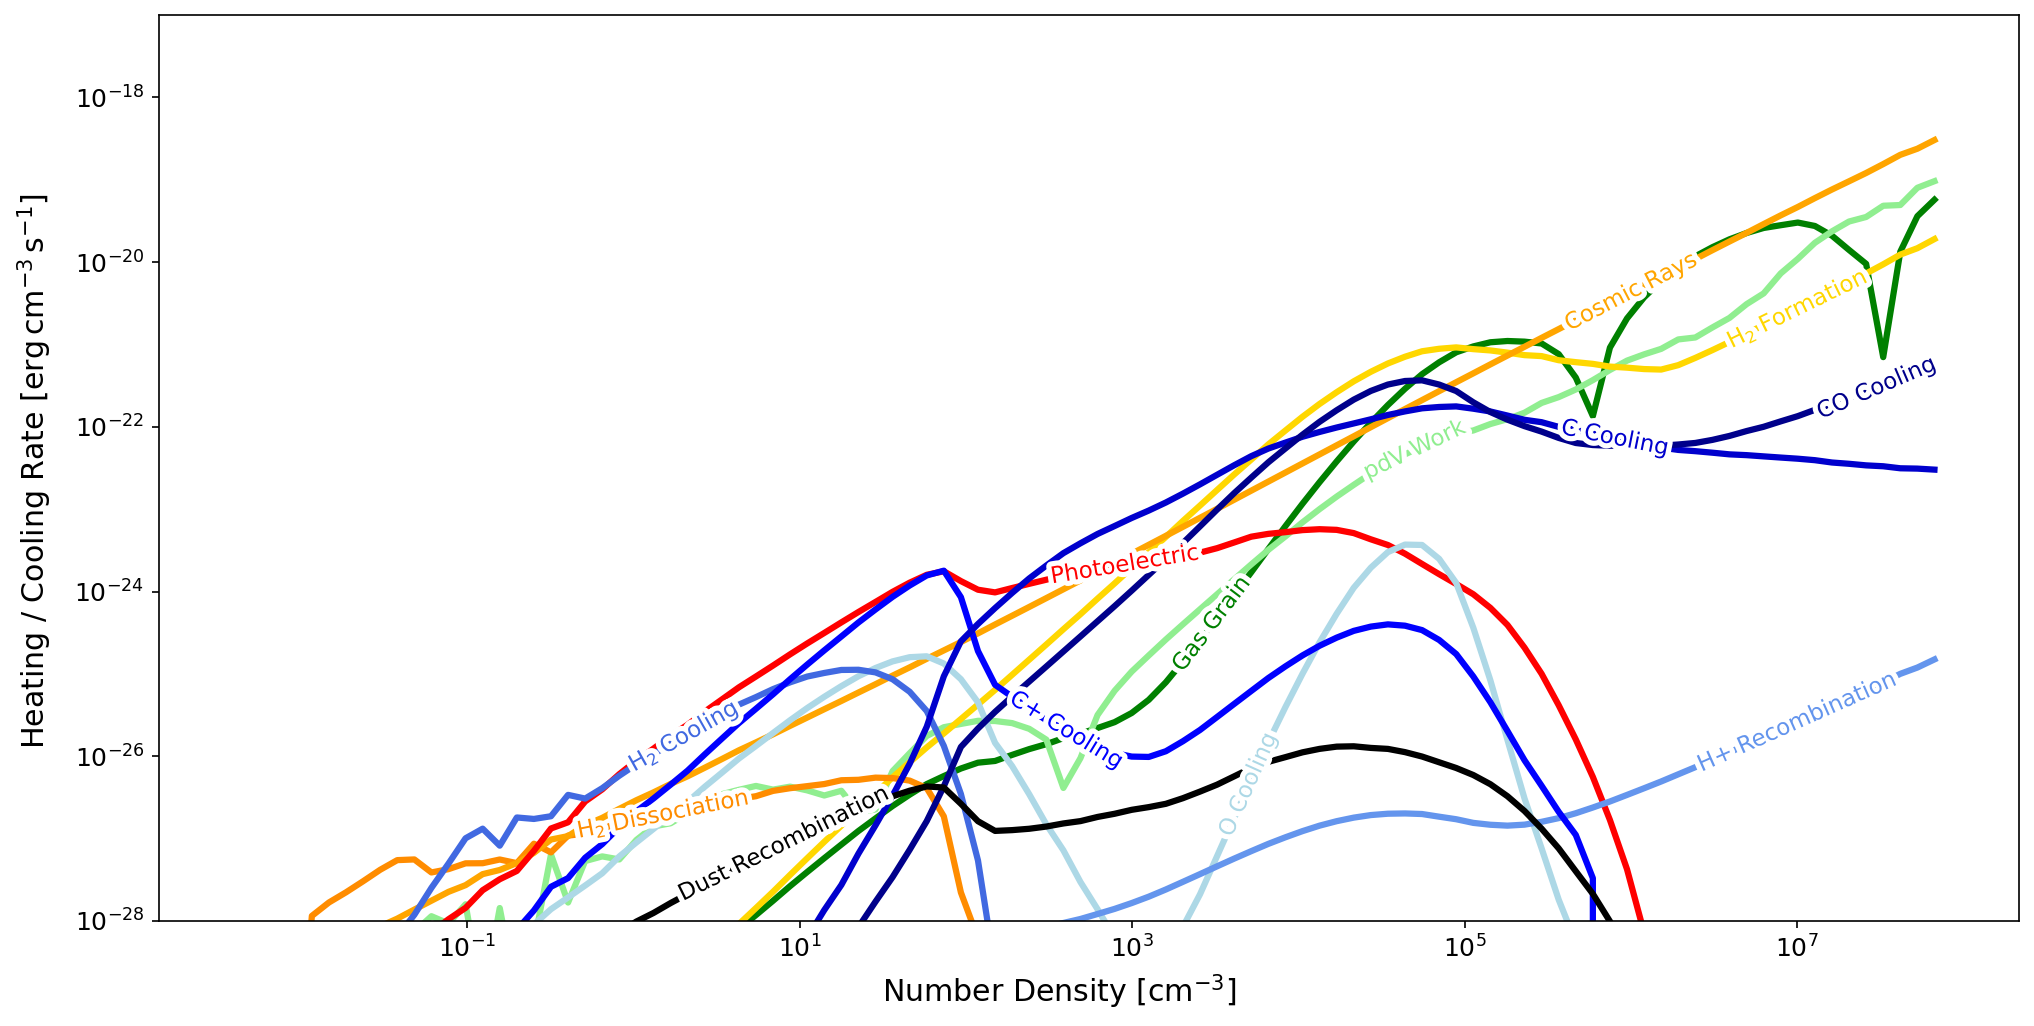

In [10]:
# Setup figure
matplotlib.rcParams['figure.dpi'] = 150
matplotlib.rcParams['font.size'] = 12.
fig, ax = plt.subplots(1,1, figsize=(16,8))

b, r, l, _ = uv1.plotHealCoolRates(normalised=False)

for i in range(len(l)):
    ax.plot(b, r[i], color=c[i], label=l[i], linewidth=3)

ax.set_xscale("log")
ax.set_yscale("log")

labelLines(ax.get_lines(), xvals=[3e3, 5e4, 1e7, 1.5, 1e6, 9e2, 0, 5e3, 1e7, 2, 4e2, 8e5, 3e7,1,1,1,1,8], fontsize=11)

ax.set_ylim(1e-28, 1e-17)

fig.supxlabel("Number Density [$\\rm cm^{-3}$]", y=0.05)
fig.supylabel("Heating / Cooling Rate [$\\rm erg \\, cm^{-3} \\, s^{-1}$]", x=0.065)